# Daimond price pridiction

In [1]:
import numpy as np
import pandas as pd
import csv
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

In [3]:
df = pd.read_csv('diamonds.csv')

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We can see that x, y, z are having zero value as min value which is totally irrelavant and wrong 

In [7]:
df.describe(include = object) #describe for categorical variable

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [8]:
df.isna().sum().sum()

0

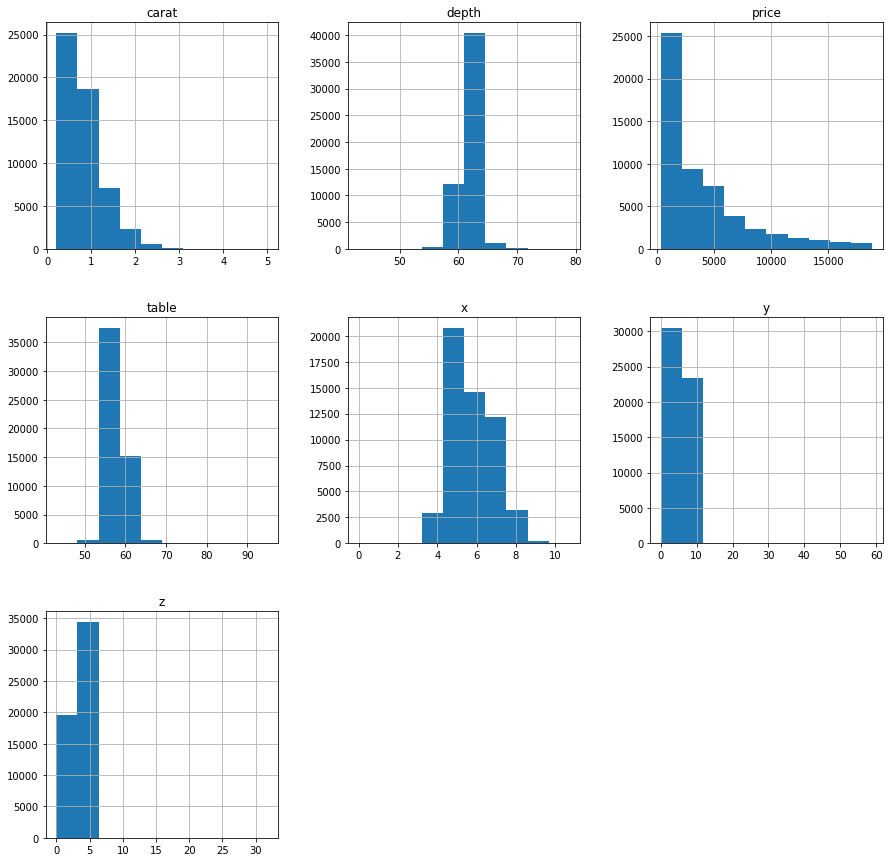

In [9]:
df.hist(figsize=(15, 15))
plt.show()

## Countplots for categorical variables

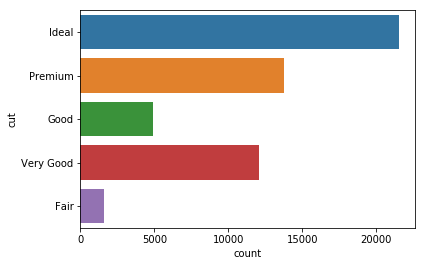

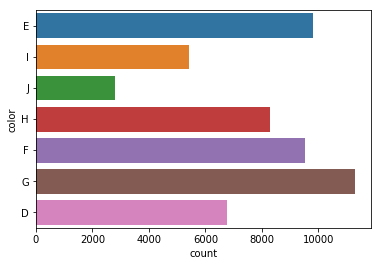

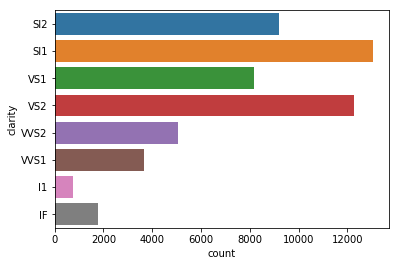

In [10]:
for cat in df.dtypes[df.dtypes == object].index:
    sns.countplot(y = cat, data = df)
    plt.show()

## Boxplots for all numerical columns

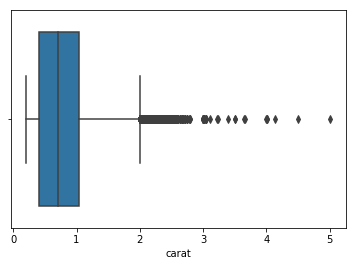

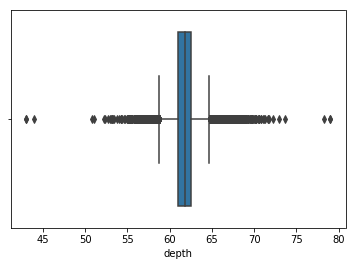

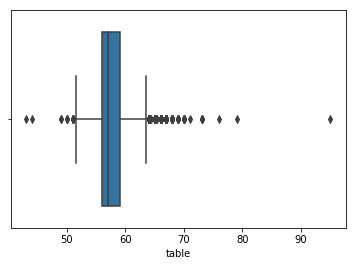

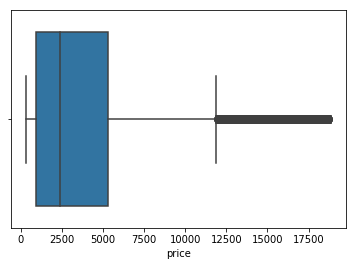

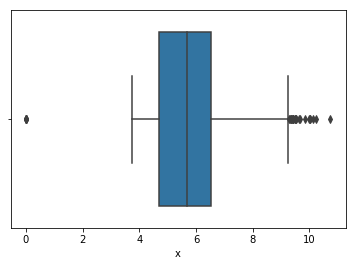

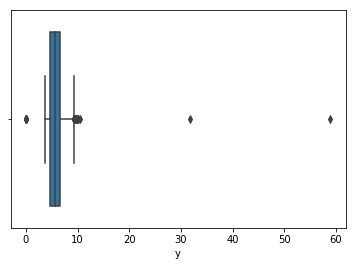

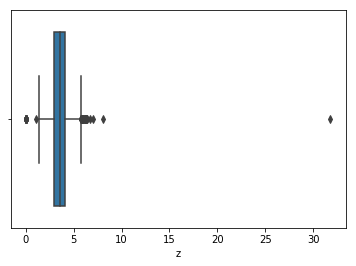

In [11]:
for num in df.dtypes[df.dtypes != object].index:
    sns.boxplot(x = num, data = df)
    plt.show()

same is evident from here as well that x==y=z=0 

In [12]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [13]:
len(df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)])

20

We can see there are 20 rows with Dimensions 'Zero'.
- We'll Drop them as it seems better choice instead of filling them with any of Mean or Median because total rows are 54000 and 20 seems really low number

In [14]:
df = df[(df[['x', 'y', 'z']] != 0).all(axis = 1)]  #dropping values

#### just to reconfirm

In [15]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


## data distribution

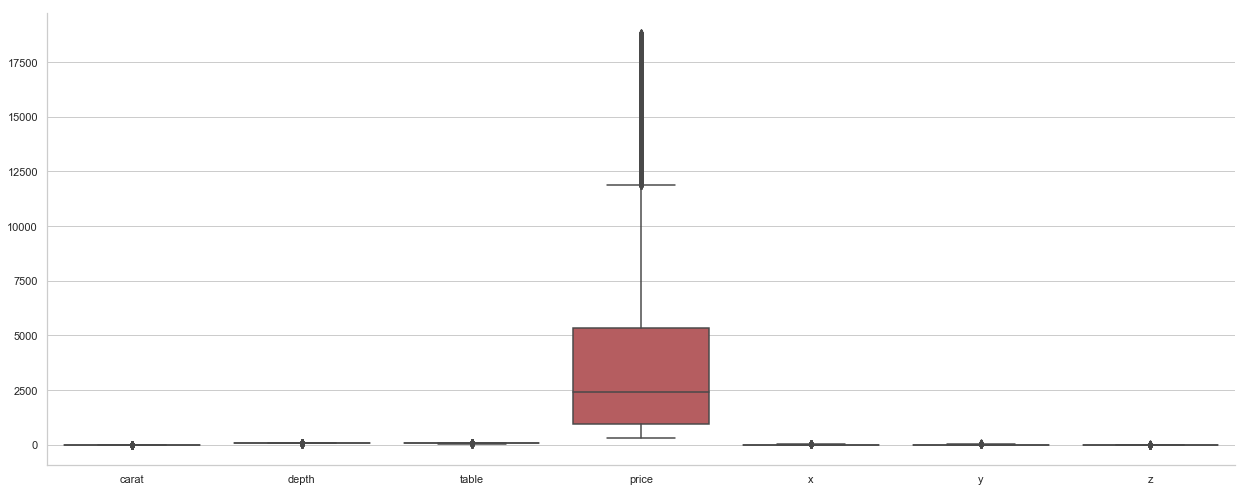

In [16]:
sns.set(style="whitegrid")
sns.factorplot(data=df , kind='box' , size=7, aspect=2.5)

data is distributed in very small area

### correlation between features

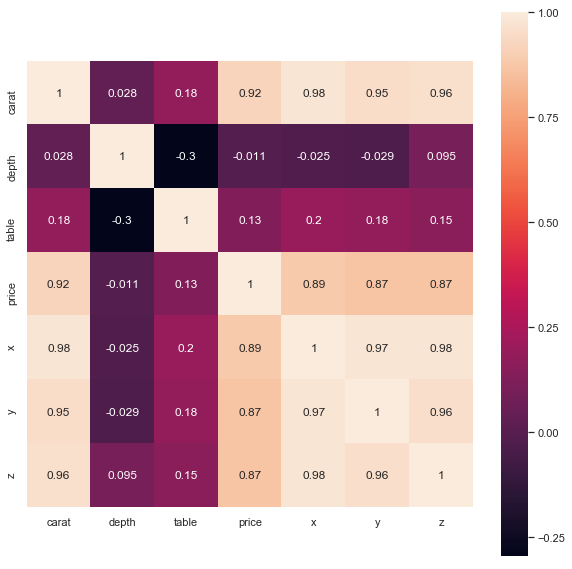

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), square=True , annot=True, cbar=True)

- Depth is inversely related to Price.This is because if a Diamond's Depth percentage is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light.

- The Price of the Diamond is highly correlated to Carat, and its Dimensions.

- The Weight (Carat) of a diamond has the most significant impact on its Price.

- Since, the larger a stone is, the Rarer it is, one 2 carat diamond will be more 'Expensive' than the total cost of two 1 Carat Diamonds of the same Quality.

- The Length(x) , Width(y) and Height(z) seems to be higly related to Price and even each other.

#### cut vs price

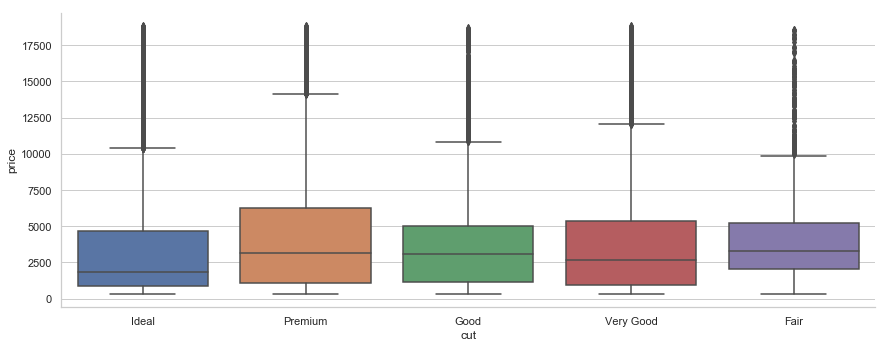

In [18]:
sns.set(style="whitegrid")
sns.factorplot(x='cut', y='price', data=df, kind='box' ,aspect=2.5 )

it seems like Premium Cut on Diamonds as we can see are the most Expensive, followed by Excellent / Very Good Cut.

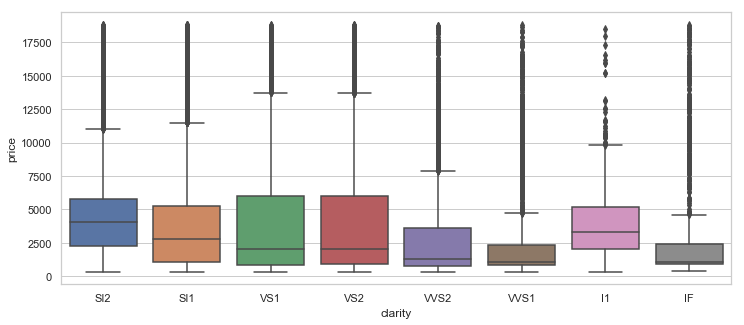

In [19]:
plt.figure(figsize = (12, 5))
sns.set(style="whitegrid")
sns.boxplot(x='clarity', y='price', data=df)

based on the given diimensions we gonna create a new feature called volume

## feature engineering

In [20]:
df['volume'] = df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


(0, 50000)

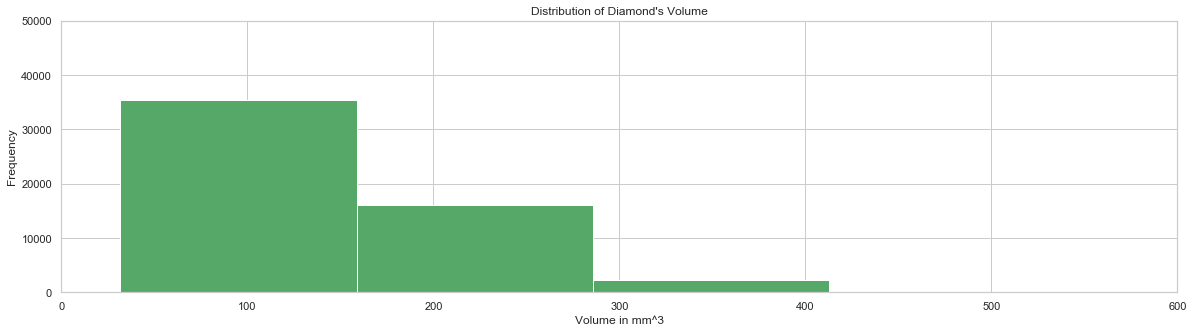

In [21]:
plt.figure(figsize=(20,5))
plt.hist( x=df['volume'] , bins=30 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0,600)
plt.ylim(0,50000)

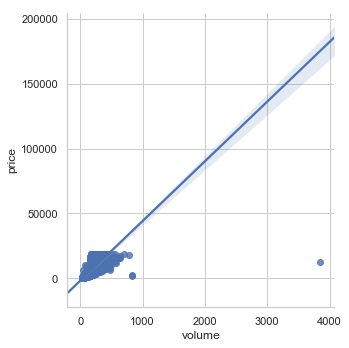

In [22]:
sns.lmplot(x='volume', y='price', data=df)

lmplot shows that our newly created variable that is volume have direct linear relationship with price

after creating volume,  x, y, z dosen't have any significant role for evaluation and hence can be droped

In [23]:
df.drop(['x','y','z'], axis=1, inplace= True)
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


## Feature Encoding
- Label the Categorical Features with digits to Distinguish.
- As we can't feed String data for Modelling.

In [24]:
from sklearn.preprocessing import LabelEncoder
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

In [25]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250


In [26]:
X = df.drop(['price'], axis=1)
y = df['price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
r2_scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'Ridge Regression', 'AdaBoost Regression', 'RandomForest Regression',
         'RandomForestRegressorTunned']

In [59]:
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

r2_scores.append(r2)


####### Linear Regression #######
Score : 0.8814
[0.87116164 0.88350756 0.87757769 0.87635168 0.88384912]

MSE    : 1911398.80 
MAE    : 926.72 
RMSE   : 1382.53 
R2     : 0.88 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [60]:
clf_la = Lasso(normalize=True)
clf_la.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_la, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_la.predict(X_test)
print('')
print('###### Lasso Regression ######')
print('Score : %.4f' % clf_la.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

r2_scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished



###### Lasso Regression ######
Score : 0.8659
[0.84325995 0.86900907 0.86386374 0.86539938 0.86976969]

MSE    : 2162331.94 
MAE    : 909.60 
RMSE   : 1470.49 
R2     : 0.87 


In [61]:
clf_rr = Ridge(normalize=True)
clf_rr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rr.predict(X_test)
print('')
print('###### Ridge Regression ######')
print('Score : %.4f' % clf_rr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

r2_scores.append(r2)


###### Ridge Regression ######
Score : 0.7537
[0.74232856 0.75599775 0.74753493 0.75626    0.74960313]

MSE    : 3970442.17 
MAE    : 1346.18 
RMSE   : 1992.60 
R2     : 0.75 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [62]:
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_ar, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_ar.predict(X_test)
print('')
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ar.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

r2_scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### AdaBoost Regression ######
Score : 0.9024
[0.85764558 0.88911418 0.85850198 0.893556   0.89337749]

MSE    : 1573084.97 
MAE    : 915.06 
RMSE   : 1254.23 
R2     : 0.90 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.2s finished


In [63]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

r2_scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Random Forest ######
Score : 0.9806
[0.97751264 0.9790181  0.98005538 0.97535322 0.97897303]

MSE    : 313325.42 
MAE    : 283.20 
RMSE   : 559.75 
R2     : 0.98 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.9s finished


In [64]:
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2')
clf_rf.fit(X_train,y_train)
print('Score : %.4f' % clf_rf.score(X_test, y_test))
pred=clf_rf.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
r2_scores.append(r2)

Score : 0.9821
R2     : 0.98 


In [65]:
r2_scores

[0.8814318797326356,
 0.865865965170926,
 0.7537050540423216,
 0.9024182039375215,
 0.980563759609504,
 0.9820656997304013]

In [66]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : r2_scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

,Algorithms,R2-Scores
5,RandomForestRegressorTunned,0.982066
4,RandomForest Regression,0.980564
3,AdaBoost Regression,0.902418
0,Linear Regression,0.881432
1,Lasso Regression,0.865866
2,Ridge Regression,0.753705


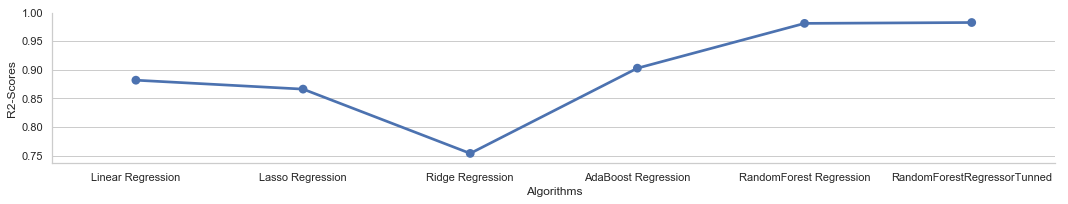

In [76]:
sns.factorplot(x='Algorithms', y='R2-Scores' , data=compare, size=3, aspect=5)

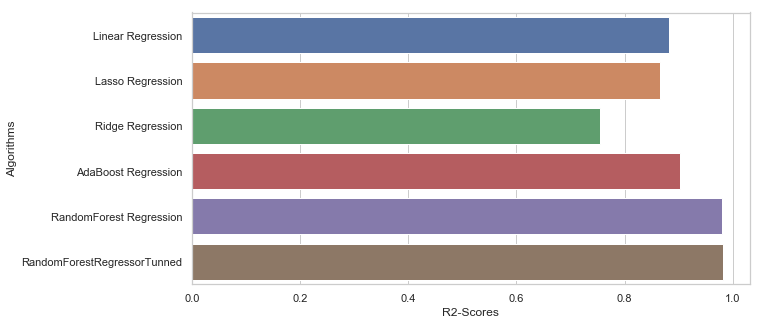

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(x='R2-Scores' , y='Algorithms' , data=compare)

## from combined analysis we can surely infer that tunned random forest is the best model for daimond prediction